## Introduzione 
Rolling Stone è una delle riviste musicali e culturali più influenti al mondo, fondata nel 1967 a San Francisco da Jann Wenner e dal critico musicale Ralph J. Gleason. Sin dai suoi inizi, la rivista si è distinta per la sua copertura approfondita della musica, in un primo momento concentrandosi solo sul rock e poi ampliando il proprio sguardo su tutti gli altri generi musicali. Una delle iniziative più celebri della rivista è la pubblicazione periodica di classifiche, tra cui quella de "Le 500 migliori canzoni di tutti i tempi". Queste classifiche non solo riflettono il gusto e le tendenze musicali dell'epoca, ma influenzano anche il modo in cui intere generazioni percepiscono la musica. Ogni edizione di questa classifica è frutto di un processo di selezione che coinvolge critici, musicisti e addetti ai lavori.

Questo progetto si propone di esplorare e confrontare due classifiche de "Le 500 migliori canzoni di tutti i tempi", pubblicate nel 2004 e nel 2021. L'analisi iniziale si concentra su aspetti generali delle due classifiche, come le decadi più rappresentate e gli artisti con il maggior numero di presenze. Questo confronto permette di osservare come le tendenze musicali e i gusti siano cambiati nel tempo.

Successivamente proviamo a rispondere ad una domanda che rappresenta il punto centrale del progetto: "Esiste una correlazione tra i testi delle canzoni e la loro posizione in classifica?". Attraverso l'analisi dei testi delle canzoni e la loro relazione con il ranking, cercheremo di capire se esistono pattern o caratteristiche comuni tra i testi delle canzoni che si trovano ai vertici della classifica rispetto a quelle posizionate più in basso. Questa indagine può essere utile per valutare se coloro che creano questa lista sono condizionati nella valutazione complessiva di una canzone.

## 1. Importazione dati
In questa sezione, importiamo le librerie necessarie e carichiamo i dataset. Utilizziamo la libreria `pandas` per la manipolazione dei dati. I dataset che stiamo caricando contengono le classifiche delle "500 migliori canzoni di tutti i tempi" pubblicate dalla rivista **Rolling Stone** in due anni diversi: 2004 e 2021. Analizzeremo questi dati per vedere come sono cambiate le classifiche nel tempo.

Questi file li possiamo trovare su kaggle al seguente link: https://www.kaggle.com/datasets/bernardinosassoli/rolling-stones-top-500-songs-of-all-time?select=rollingstone.csv

In [1]:
import pandas as pd

In [2]:
df_2004 = pd.read_csv('rollingstone_2004.csv')
df_2021 = pd.read_csv('rollingstone_2021.csv')

In [3]:
# ribaltiamo le righe (per avere la prima riga con l'ultimo indice)
df_2004 = df_2004.iloc[::-1]
df_2021 = df_2021.iloc[::-1]

# ribaltiamo la colonna 'ranking' (per avere la prima riga con il primo posto)
df_2004['Ranking'] = df_2004['Ranking'].iloc[::-1].values
df_2021['Ranking'] = df_2021['Ranking'].iloc[::-1].values

# aggiungiamo 1 a ogni valore di 'ranking' (per avere la classifica partente da 1)
df_2004['Ranking'] += 1 
df_2021['Ranking'] += 1

# resettiamo l'indice
df_2004.reset_index(drop=True, inplace=True)
df_2021.reset_index(drop=True, inplace=True)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2. Pulizia dei dati

I file csv che abbiamo scaricato sono stati creati per un altro scopo, motivo per cui sarà necessario eliminare tutte quelle informazione che non sono necessarie. Le operazioni che andremo ad effettuare sarà: Rimozione colonne superflue, Modifica valori e ordine colonne al fine di migliorare la leggibilità del dataframe.

In [5]:
df_2004.head(5)

,Ranking,Artist,Title,Writers,Producer,Year,Spotify id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,Bob Dylan,Like a Rolling Stone,Dylan,Tom Wilson,65,3AhXZa8sUQht0UEdBJgpGc,74,0.483,0.721,0,-6.836,1,0.0320,0.7290,0.000000,0.1890,0.562,95.261,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,2,The Rolling Stones,(I Can't Get No) Satisfaction,"Mick Jagger, Keith Richards",Andrew Loog Oldham,65,2PzU4IB8Dr6mxV3lHuaG34,79,0.723,0.863,2,-7.890,1,0.0338,0.0383,0.031700,0.1280,0.931,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813,4
2,3,John Lennon,Imagine,John Lennon,"Lennon, Phil Spector, Yoko Ono",71,7pKfPomDEeI4TPT6EOYjn9,78,0.547,0.257,0,-12.358,1,0.0252,0.9070,0.183000,0.0935,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4
3,4,Marvin Gaye,What's Going On,"Gaye, Renaldo Benson, Al Cleveland",Gaye,71,4RNHbYuRaZesMODlihhsUG,63,0.433,0.733,1,-9.244,0,0.0491,0.3070,0.000144,0.0827,0.742,102.662,audio_features,4RNHbYuRaZesMODlihhsUG,spotify:track:4RNHbYuRaZesMODlihhsUG,https://api.spotify.com/v1/tracks/4RNHbYuRaZes...,https://api.spotify.com/v1/audio-analysis/4RNH...,236467,4
4,5,Aretha Franklin,Respect,Otis Redding,Jerry Wexler,67,7s25THrKz86DM225dOYwnr,74,0.805,0.558,0,-5.226,1,0.0410,0.1640,0.000022,0.0546,0.965,114.950,audio_features,7s25THrKz86DM225dOYwnr,spotify:track:7s25THrKz86DM225dOYwnr,https://api.spotify.com/v1/tracks/7s25THrKz86D...,https://api.spotify.com/v1/audio-analysis/7s25...,147600,4


In [6]:
df_2004.drop(columns=['Writers','Producer','Spotify id','Popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href','analysis_url','duration_ms','time_signature'], inplace=True)
df_2021.drop(columns=['Writers','Spotify id','Popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href','analysis_url','duration_ms','time_signature'], inplace=True)

In [7]:

df_2004['Year'] = df_2004['Year'].apply(lambda y: '200' + str(y) if str(y) in ['0','1','2','3','4','5','6','7','8','9']  else '19' + str(y))

In [8]:
# Cambiamo l'ordine delle colonne
df_2004 = df_2004[['Title','Artist','Year','Ranking']]
df_2021 = df_2021[['Title','Artist','Year','Ranking']]

In [9]:
# Rendiamo le colonne ranking e anno interi
df_2004['Ranking'] = df_2004['Ranking'].astype(int)
df_2004['Year'] = df_2004['Year'].astype(int)

df_2021['Ranking'] = df_2021['Ranking'].astype(int)
df_2021['Year'] = df_2021['Year'].astype(int)

## 3. Analisi iniziale

In questa prima fase andremo ad esaminare alcuni aspetti dai dataframe, nel dettaglio andremo a controllare:
- Gli artisti più presenti nelle singole classifiche
- Gli artisti presenti in tutte e due le classifiche
- Il numero di canzoni per decennio nelle singole classifiche

In [10]:
# Artisti piu presenti nelle singole classifiche
artist_2004 = df_2004['Artist'].value_counts()
artist_2021 = df_2021['Artist'].value_counts()

print('10 artisti piu presenti nella classifica del 2004')
print(artist_2004.head(10))

print()

print('10 artisti piu presenti nella classifica del 2021')
print(artist_2021.head(10))

10 artisti piu presenti nella classifica del 2004
Artist
The Beatles                    23
The Rolling Stones             14
Bob Dylan                      13
Elvis Presley                  11
U2                              8
The Jimi Hendrix Experience     7
The Beach Boys                  7
Sly and the Family Stone        6
Led Zeppelin                    6
Chuck Berry                     6
Name: count, dtype: int64

10 artisti piu presenti nella classifica del 2021
Artist
The Beatles           12
Bob Dylan              7
The Rolling Stones     7
David Bowie            6
Bruce Springsteen      5
Joni Mitchell          4
Elton John             4
Aretha Franklin        4
Marvin Gaye            4
Prince                 4
Name: count, dtype: int64


Possiamo notare gia dal primo confronto come nel corso di 17 anni la situazione sia cambiata. Nel 2004 i primi 4 artisti(The Beatles,Bob Dylan,The Rolling Stones,Elvis Presley) hanno in classifica un totale di 60 canzoni (ovvero il 12%) e ognuno di questi ha più di 10 canzoni in classifica. Nel 2021 i solo un artista ha piu di 10 canzoni in classifica (The Beatles). Le prime 3 posizioni sono identiche alla classifica precedente tuttavia i numeri sono dimezzati. Per quanto riguarda le altre posizioni queste cambiano totalmente da una classifica ad un altra con il caso paricolare di Elvis Presley che non rientra neanche nella classifica.

In [11]:
artists_2004 = df_2004['Artist']
artists_2021 = df_2021['Artist']
# Artisti nella classifica del 2004
print('Artisti nella classifica del 2004: ' + str(len(artists_2004.unique())))
# Artisti nella classifica del 2021
print('Artisti nella classifica del 2021: ' + str(len(artists_2021.unique())))

common_artists = set(artists_2004).intersection(set(artists_2021))
print("Numero di artisti presenti in entrambe le classifiche: " + str(len(common_artists)))

print("Artisti presenti in entrambe le classifiche:\n")
for artist in common_artists:
    print(artist)

Artisti nella classifica del 2004: 255
Artisti nella classifica del 2021: 362
Numero di artisti presenti in entrambe le classifiche: 179
Artisti presenti in entrambe le classifiche:

John Lee Hooker
Black Sabbath
The Kingsmen
The Flamingos
Jerry Lee Lewis
Patsy Cline
Johnny Cash
Kelly Clarkson
The Doors
New York Dolls
Eddie Cochran
Derek and the Dominos
Eric B. and Rakim
Donna Summer
Blue Oyster Cult
The Four Tops
Amy Winehouse
James Taylor
The Isley Brothers
The Band
AC/DC
Otis Redding
Dolly Parton
50 Cent
Prince
Led Zeppelin
Jimmy Cliff
The Eagles
The Shangri-Las
Coldplay
Them
The Cure
The Drifters
Don Henley
Run-DMC
Pavement
Metallica
The Righteous Brothers
Jeff Buckley
The Mamas and the Papas
The Velvet Underground
Roberta Flack
Afrika Bambaataa and Soulsonic Force
Earth Wind and Fire
Bobbie Gentry
Rick James
Joy Division
Billy Joel
Crosby Stills and Nash
The Staple Singers
The Animals
Rod Stewart
Weezer
The Ronettes
The Smiths
The Jimi Hendrix Experience
John Lennon
Pixies
Chic
Gn

Le righe di codice scritte sopra ci mostrano che la classifica del 2021 presenta molti più artisti rispetto a quella del 2004. Inoltre il numero di artisti presenti in entrambe le classifiche è 167 cioè il 45% della classifica del 2021 e addirittura il 64% della classifica del 2004. Questo cambiamento mostra come la musica nel corso degli anni non dipende più da pochi artisti, tuttavia questa conclusione richiederebbe ulteriori studi, sarebbero necessario raccogliere altre classifiche dei prossimi anni e verificare se tutto ciò continua o se sia una caso limitato.

In [12]:
df_2004

,Title,Artist,Year,Ranking
0,Like a Rolling Stone,Bob Dylan,1965,1
1,(I Can't Get No) Satisfaction,The Rolling Stones,1965,2
2,Imagine,John Lennon,1971,3
3,What's Going On,Marvin Gaye,1971,4
4,Respect,Aretha Franklin,1967,5
5,Good Vibrations,The Beach Boys,1966,6
6,Johnny B. Goode,Chuck Berry,1958,7
7,Hey Jude,The Beatles,1968,8
8,Smells Like Teen Spirit,Nirvana,1991,9
9,What'd I Say,Ray Charles,1959,10


In [13]:
# Contiamo quante canzoni per decennio sono presenti nelle due classifiche
decade_2004 = {}
for year in df_2004['Year']:
    decade = str(year)[0:3] + '0'
    if decade in decade_2004:
        decade_2004[decade] += 1
    else:
        decade_2004[decade] = 1

decade_2021 = {}
for year in df_2021['Year']:
    decade = str(year)[0:3] + '0'
    if decade in decade_2021:
        decade_2021[decade] += 1
    else:
        decade_2021[decade] = 1

# Ordiniamo i dizionari in base all'ordine temporale
decade_2004 = dict(sorted(decade_2004.items()))
decade_2021 = dict(sorted(decade_2021.items()))

In [14]:
decade_2004

{'1940': 2,
 '1950': 68,
 '1960': 196,
 '1970': 131,
 '1980': 55,
 '1990': 22,
 '2000': 26}

In [15]:
decade_2021

{'1930': 2,
 '1940': 1,
 '1950': 24,
 '1960': 108,
 '1970': 144,
 '1980': 80,
 '1990': 70,
 '2000': 36,
 '2010': 32,
 '2020': 3}

Quest'ultimo confronto conferma il trend gia visto con i punti precedenti, ovvero andando avanti nel tempo la classifica risulta meno incentrata su pochi cantanti o anni, infatti se nella classifica del 2004 circa la metà delle canzoni sono concentrate negli anni 70 e 80, nella classifica del 2021 ,questi restano gli anni con piu canzoni ma, la distanza con gli altri anni si riduce, in seguito ad un netto aumento delle canzoni degli anni successivi. Ricordiamo sempre che questa classifica è redatta da Rolling Stones, quindi l'analisi effettuata è utile per capire l'opinione di una testata giornalistica che rappresenta una figura importante nello scenario musicale, tuttavia non è comunque possibile dire se le canzoni scelte sono oggettivamente le migliori 500.

## 4. Scraping testi

Per la seconda parte della nostra analisi sarà necessario lavorare con i testi delle canzoni. Per ottenere questi testi dovremmo fare web scraping, è quindi necessario l'utilizzo di alcune librerie fondamentali come `requests` e `BeatifulSoups`. Request è una libreria che permette di ottenere pagine HTTP. BeautifulSoup riesce ad estrarre informazioni da pagine web. Infine abbiamo re, una libreria python che introduce le espressioni regolare, utili per pulire i testi.

**Request: https://requests.readthedocs.io/en/latest/**

**BeatifulSoup: https://www.crummy.com/software/BeautifulSoup/**

In [16]:
import requests
from bs4 import BeautifulSoup as soup
import re

In [17]:
def format_url(title, artist):
    # Rimuoviamo i caratteri speciali
        title = re.sub(r'[()\[\]]', '', title)
        title = re.sub(r'-', ' ', title)
        title = re.sub(r' +', ' ', title)
        title = re.sub(r' ', '-', title)
        title = re.sub(r"'", '', title)
        title = re.sub(r',', '', title)
        title = re.sub(r':', '', title)
        title = re.sub(r'\.', '', title)
        title = re.sub(r'\?', '', title)
        title = re.sub(r'\!','',title)
        title = re.sub(r'/', '-', title)
        
        
        artist = re.sub(r'[()\[\]]', '', artist)
        artist = re.sub(r'-', ' ', artist)
        artist = re.sub(r'\+', '', artist)
        artist = re.sub(r' +', ' ', artist)
        artist = re.sub(r' ', '-', artist)
        artist = re.sub(r"'", '', artist)
        artist = re.sub(r',', '', artist)
        artist = re.sub(r'\.', '', artist)
        artist = re.sub(r'/', '-', artist)

        # elimina il testo "feat." e la parte successiva
        artist = re.sub(r'feat.*', '', artist)

        return title, artist

In [18]:
def add_url(df):
    # Copia del dataframe
    urls = []
    titles = df['Title']
    artists = df['Artist']

    for i in range(500):
        title = titles[i]
        artist = artists[i]

        title, artist = format_url(title, artist)
        
        url = 'https://www.genius.com/' + artist + '-' + title + '-lyrics'
        urls.append(url)

    df['URL'] = urls
    return df

Le funzioni presenti sopra lavorano insieme e hanno lo scopo di trovare gli URL relativi ad ogni canzone. La funzione `format_url` si occupa di riscrivere le informazioni relative all'artista e al titolo in un formato adeguato per un URL. La funzione `add_url` crea una nuova colonna con gli url relativi alle singole canzoni e per creare questi sfrutta la funzione precedente e poi genera l'url corretto.

In [19]:
df_2004 = add_url(df_2004)
df_2021 = add_url(df_2021)    

In [20]:
def get_clear_text(text_raw):
    full_text = ""

    for t in text_raw:
        full_text += " " + t.text.strip()

    full_text = re.sub("\[.*?]", "", full_text) #rimuove il testo tra le parentesi quadre
    full_text = re.sub(r"\([^()]*\)", "", full_text) #rimuove il testo tra le parentesi tonde
    full_text = re.sub(r"(\w)([A-Z])", r"\1 \2", full_text) #trova una lettera minuscola seguita da una maiuscola e le sostituisce con la stessa sequenza ma con uno spazio tra di loro 
    full_text = full_text.replace("'", " ").replace('"', " ")
    full_text = full_text.replace("!", "! ").replace("?", "? ") #aggiunge uno spazio dopo i segni ! e ?
    full_text = full_text.lower() #trasforma tutto in minuscolo

    return full_text

In [21]:
def extract_lyrics(url):
    page = requests.get(url)
    page_soup = soup(page.content, 'html.parser')
    text_raw = page_soup.find_all("div", {"class": "Lyrics__Container-sc-1ynbvzw-1"})
    text = get_clear_text(text_raw)
    if text == "":
        text = "ERRORE"
    return text

Le due funzioni presenti sopra lavorano con i testi delle canzoni. `get_clear_text` si occupa di eliminare tutte le informazioni superflue dal testo (il sito infatti presenta parti di testo inutili, ad esempio "Strofa 1", "Rit.", queste non sono utili per il nostro obiettivo). La funzione `extract_lyrics` sfrutta l'url di una canzone per effettuare la richiesta web, trovare la pagina, prendere solo il testo, pulirlo tramite la funzione precedente e tornarlo in output.

In [22]:
df_2004['Lyrics'] = df_2004['URL'].apply(extract_lyrics)
df_2021['Lyrics'] = df_2021['URL'].apply(extract_lyrics)

df_2004.to_csv('rollingstone_2004(lyrics).csv', index=False)
df_2021.to_csv('rollingstone_2021(lyrics).csv', index=False)
# Questo codice richiede molto tempo per eseguire, motivo per cui portiamo i dataframe in un file csv, in modo tale da poterli riutilizzare senza rieseguire il codice

Per effettuare lo scraping dei testi è stato necessario non solo pulire i testi raccolti tramite web, rimuovendo tutte le informazioni inutili inserite per migliorare l'estetica del sito web, ma anche lavorare sugli artisti e i titoli delle canzoni, infatti molti di questi presentavano degli errori, dovuti probabilmente allo scarping effettuato da un sito diverso rispetto a quello che abbiamo utilizzato per trovare i testi, quindi è stato necessario cambiare, sia manualmente sia tramite codice, alcune informazioni presenti nei dataframe di partenza, per questo motivo abbiamo creato i due nuovi dataframe e li abbiamo esportati come come file csv, in modo tale che chiunque voglia lavorare con questi possa farlo tranquillamente, risparmiando tempo.

Alcuni testi sono assenti e al loro posto è presente una keyword "ERRORE", questa è stata utilizzata in un primo momento per capire quali testi non si riuscivano ad ottenere tramite scraping, tuttavia una volta compleatato possiamo vedere questa keyword come un indicazione che le canzoni contrassegnate non hanno un testo, cioè sono solo base musicale. Le canzoni in questione sono un numero molto basso che non va ad intralciare il nostro lavoro.

## 5. Natural Language Processing (NLP)
Una volta raccolte le informazioni e i testi relativi ad ogni canzone, eseguiamo alcuni passaggi della pipeline NLP. Per farlo sfruttiamo `nltk`, una libreria python utilizzata per lavorare con il linguaggio naturale.

**nltk: https://www.nltk.org/**

In [23]:
df_2004 = pd.read_csv('rollingstone_2004(lyrics).csv')
df_2021 = pd.read_csv('rollingstone_2021(lyrics).csv')

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alesc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alesc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alesc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
all_words = {}

def get_most_common_words(df):
    for i in range(500):
        lyrics = df['Lyrics'][i]
        words = word_tokenize(lyrics)
        words = [w for w in words if not w in stop_words]
        words = [w for w in words if not w in string.punctuation]
        words = [lemmatizer.lemmatize(w) for w in words]
        for word in words:
            if word in all_words:
                all_words[word] += 1
            else:
                all_words[word] = 1

La funzione `get_most_common_words` esegue alcuni passaggi della pipeline NLP, ovvero tokenizzazione, rimozione delle stop words e lemmatizzazione.

La tokenizzazione è il processo di suddivisione di un testo in unità più piccole chiamate "token". La tokenizzazione è il primo passo in molte applicazioni di NLP.

Le "stop words" sono parole comuni che spesso vengono rimosse dai testi durante l'elaborazione del linguaggio naturale. Queste parole sono considerate non essenziali per il significato complessivo del testo e includono termini come articoli, preposizioni, pronomi e congiunzioni. 

La lemmatizzazione è il processo di riduzione delle forme flesse di una parola alla sua forma base o lemma. La forma base è il modo in cui una parola appare nel dizionario. La lemmatizzazione consente di trattare le forme diverse di una parola come un'unica entità.

In [26]:
get_most_common_words(df_2004)
get_most_common_words(df_2021)

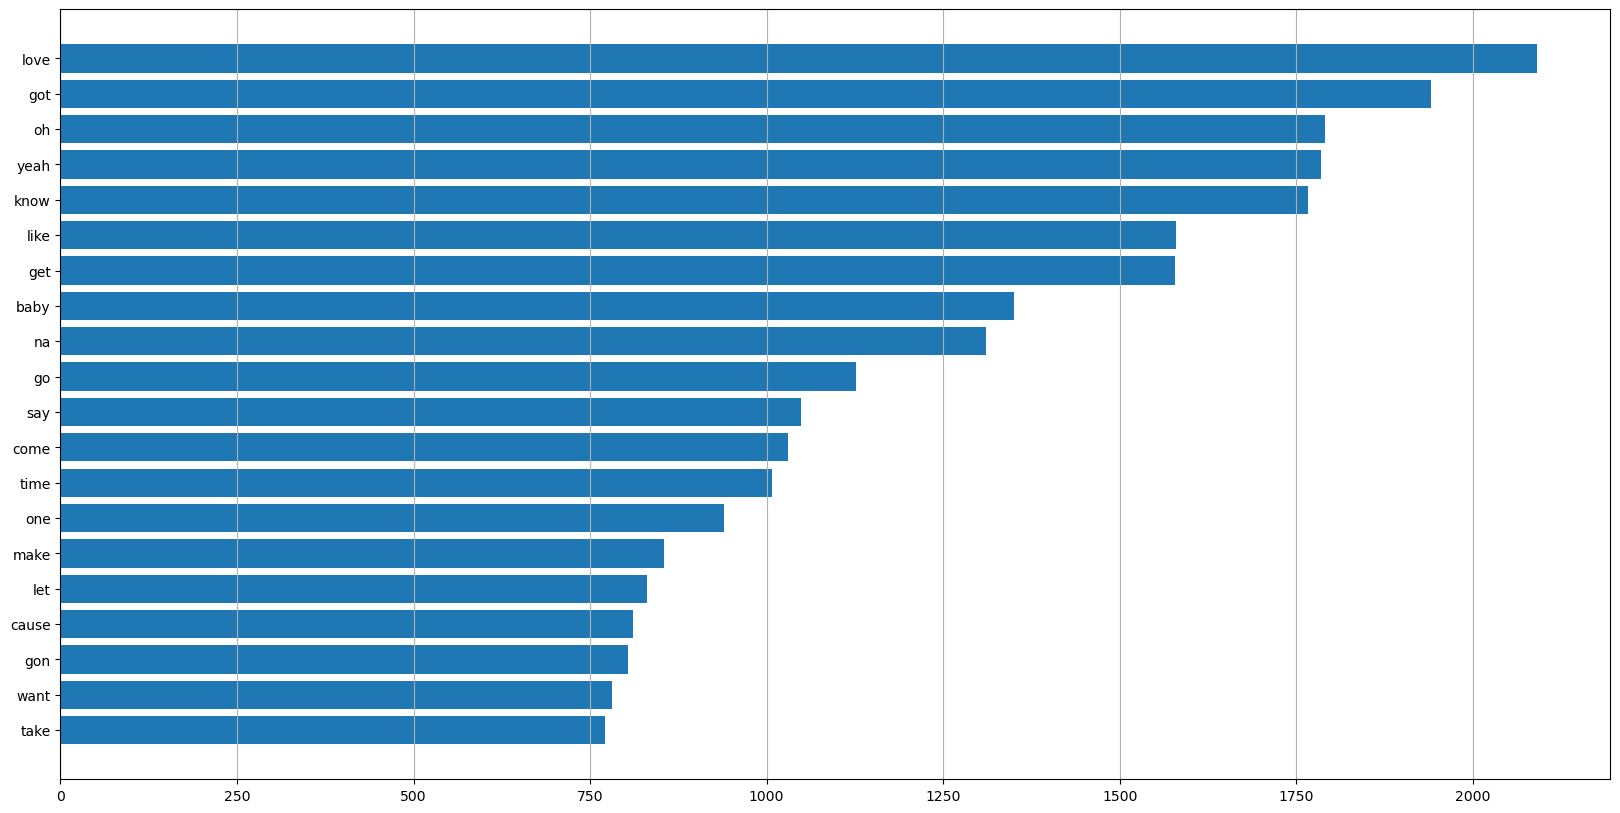

In [36]:
import matplotlib.pyplot as plt

sorted_words = dict(sorted(all_words.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(20, 10))
plt.barh(list(sorted_words.keys())[:20], list(sorted_words.values())[:20])
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

Eseguiti i passaggi NLP, andiamo a plottare le 20 parole piu utilizzate(keywords), queste ci possono dare delle informazioni in generale sui testi delle canzoni.

## 6. Sentiment Analysis
La Sentiment Analysis è una tecnica di elaborazione del linguaggio naturale (NLP) utilizzata per determinare il tono emotivo dietro un testo.

Eseguiamo adesso il punto centrale del progetto, ovvero vogliamo verificare se esiste una correlazione tra la posizione nella classifica e il sentimento della canzone, quindi vogliamo capire per esempio se una canzone con un sentimento positivo tende ad occupare posizioni piu alte rispetto ad una canzone triste o viceversa.

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

sentiment_analyzer = SentimentIntensityAnalyzer()

Per effettuare la sentiment analysis utilizziamo `VADER` (Valence Aware Dictionary and sEntiment Reasoner), uno strumento per analizzare testi informali, come in questo caso i testi delle canzoni. VADER è un modello basato su regole che utilizza un dizionario di termini già etichettati con un punteggio di valenza emotiva (positivo, negativo o neutro), inoltre è in grado di gestire con precisione espressioni come intensificatori, negazioni e persino emoticon o punteggiatura.

In [38]:
def get_sentiment(text):
    if text == "ERRORE":
        return 0, 0, 0, 0
    sentiment = sentiment_analyzer.polarity_scores(text)
    return sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']

df_2004['Negative'], df_2004['Neutral'], df_2004['Positive'], df_2004['Compound'] = zip(*df_2004['Lyrics'].apply(get_sentiment))
df_2021['Negative'], df_2021['Neutral'], df_2021['Positive'], df_2021['Compound'] = zip(*df_2021['Lyrics'].apply(get_sentiment))

La funzione `get_sentiment` ha lo scopo di calcolare i punteggi di sentiment di un dato testo utilizzando il metodo di sentiment analysis di VADER. Bisogna far attenzione ai testi che contengono la parola "ERRORE", questi infatti vengono impostati ad un valore standard (0,0,0,0) e non verranno conteggiati successivamente.

In [39]:
def plot_sentiment_vs_ranking(df):
    fig, axs = plt.subplots(2, 2, figsize=(25, 10))

    axs[0, 0].scatter(df['Ranking'], df['Compound'], color='blue')
    axs[0, 0].set_title('Ranking vs Compound Sentiment Score')
    axs[0, 0].set_xlabel('Ranking')
    axs[0, 0].set_ylabel('Compound Sentiment Score')

    axs[0, 1].scatter(df['Ranking'], df['Positive'], color='green')
    axs[0, 1].set_title('Ranking vs Positive Sentiment Score')
    axs[0, 1].set_xlabel('Ranking')
    axs[0, 1].set_ylabel('Positive Sentiment Score')

    axs[1, 0].scatter(df['Ranking'], df['Negative'], color='red')
    axs[1, 0].set_title('Ranking vs Negative Sentiment Score')
    axs[1, 0].set_xlabel('Ranking')
    axs[1, 0].set_ylabel('Negative Sentiment Score')

    axs[1, 1].scatter(df['Ranking'], df['Neutral'], color='purple')
    axs[1, 1].set_title('Ranking vs Neutral Sentiment Score')
    axs[1, 1].set_xlabel('Ranking')
    axs[1, 1].set_ylabel('Neutral Sentiment Score')

    plt.show()


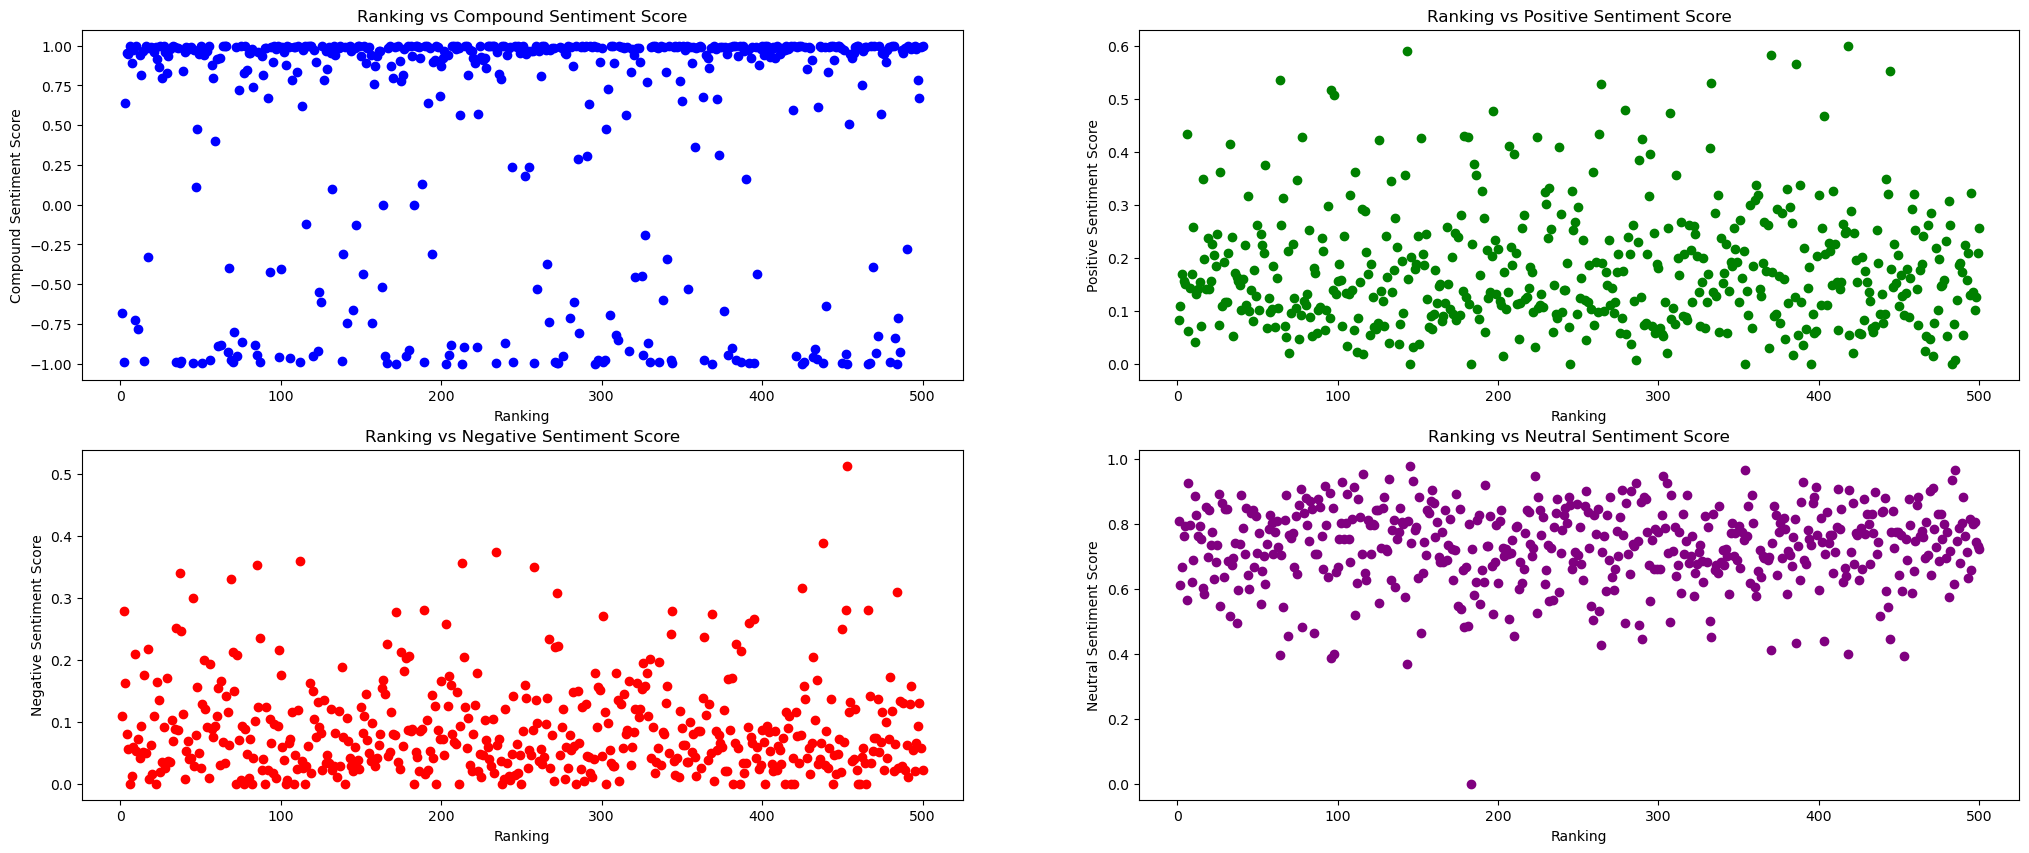

In [40]:
plot_sentiment_vs_ranking(df_2004)

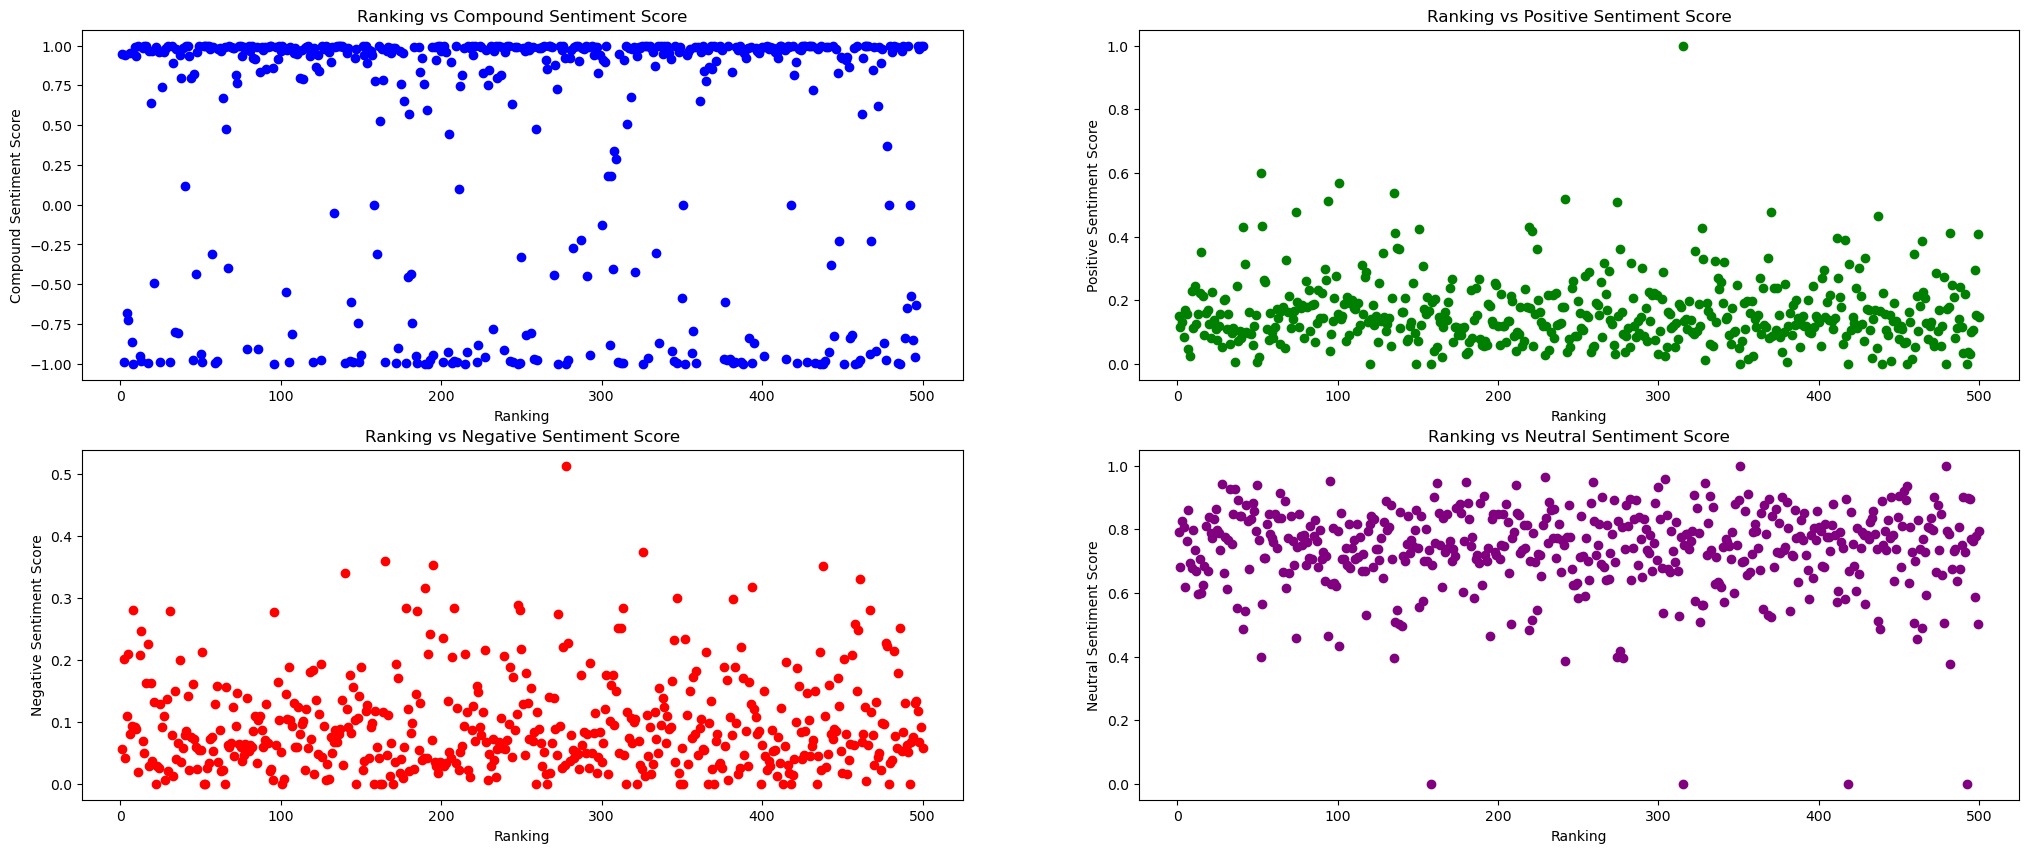

In [41]:
plot_sentiment_vs_ranking(df_2021)

Analizziamo la situazione che ci viene presentata nei seguenti grafici. Possiamo vedere come in tutte e due le classifiche la maggior parte delle canzoni hanno un sentimento "Compound" vicino al valore 1, questo vuol dire che quei testi esprimono un sentimento positivo. Nonostante ciò ci sono comunque un numero non indifferente di canzoni con uno score che tende a -1, tuttavia sono sparse equamente per tutta l'asse x, questo vuol dire che non esiste una concetrazione basata sulla loro posizione in classifica. Per quanto riguarda gli altri grafici possiamo notare anche qui come questi siano abbastanza simili tra le due classifiche,anche se "Neutral" e "Positive" risultano più concentrate nel 2021 motivo per cui ci aspettiamo un cambiamento anche in 'Negative'.

In [42]:
def get_sentiment_mean(df):
    df = df[df['Lyrics'] != "ERRORE"]
    return df[['Negative', 'Neutral', 'Positive', 'Compound']].mean()

La funzione `get_sentiment_mean` torna la media dei sentiment

In [43]:
get_sentiment_mean(df_2004)

Negative    0.089253
Neutral     0.732818
Positive    0.177896
Compound    0.494105
dtype: float64

In [44]:
get_sentiment_mean(df_2021)

Negative    0.095588
Neutral     0.743372
Positive    0.161016
Compound    0.421427
dtype: float64

I risultati mostrano ciò che avevamo visto precedentemente con i grafici, ovvero che nel 2021 il sentimento 'Positive' e 'Neutral' cambia rispetto al 2004, e ovviamente cambia anche 'Negative' (tuttavia questo non si riusciva a notare analizzando i risultati solo visivamente).

## Conclusione
L'analisi condotta sui testi delle canzoni presenti nelle classifiche delle 500 migliori canzoni di tutti i tempi, pubblicate da Rolling Stone nel 2004 e nel 2021, ha evidenziato un aspetto interessante: non esiste una correlazione significativa tra il sentiment dei testi e la posizione delle canzoni nel ranking. I risultati mostrano che, indipendentemente dal posizionamento in classifica, le canzoni tendono a presentare sentiment simili. Questa scoperta suggerisce che, almeno per quanto riguarda i sentiment espressi nei testi, altri fattori giocano un ruolo più determinante nella valutazione e classificazione delle canzoni. Questi potrebbero includere aspetti musicali, l'influenza culturale dell'artista, la popolarità, o persino il contesto storico in cui la canzone è stata rilasciata. Dunque  il valore di una canzone, come percepito dai critici e dal pubblico, sembra essere più complesso e multidimensionale rispetto al semplice tono emotivo dei suoi testi.

Questo studio tuttavia potrebbe essere approfondito aggiungendo altre classifiche o tenendo conto di altri fattori come la musica o il ritmo di una canzone, infatti non analizzando questi aspetti abbiamo dovuto escludere alcune canzoni che non presentavano testo e altre canzoni che hanno contribuito in realtà presentano poche parole oppure ripetizioni di frasi(un esempio è Acknowledgement di John Coltrane).